In [26]:
# # Import necessary libraries
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from tensorflow import keras
# from tensorflow.keras import layers
# from scikeras.wrappers import KerasClassifier
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.metrics import accuracy_score

# # Load the dataset
# train_data = pd.read_csv("dataset/train.csv")
# test_data = pd.read_csv("dataset/test.csv")

# # Data Preprocessing
# features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
# target = "Survived"

# def preprocess_data(df):
#     df["Age"].fillna(df["Age"].mean(), inplace=True)
#     df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
#     df["FamilySize"] = df["SibSp"] + df["Parch"]
#     return df[features]

# X_train = preprocess_data(train_data)
# y_train = train_data[target]
# X_test = preprocess_data(test_data)

# # Apply random oversampling to balance the data
# oversampler = RandomOverSampler(random_state=1)
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# # Split the resampled data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=1)

# # Define a Keras neural network model
# def create_keras_model():
#     model = keras.Sequential([
#         layers.Dense(128, input_dim=X_train.shape[1], activation="relu"),
#         layers.Dense(64, activation="relu"),
#         layers.Dense(32, activation="relu"),
#         layers.Dense(1, activation="sigmoid")
#     ])
#     model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#     return model

# keras_classifier = KerasClassifier(build_fn=create_keras_model, epochs=50, batch_size=64, verbose=0)

# # Ensemble Learning (Soft Voting)
# models = [
#     ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)),
#     ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=1)),
#     ("Decision Tree", DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=1)),
#     ("SVM (RBF Kernel)", SVC(kernel="rbf", C=1.0, gamma=0.2, probability=True, random_state=1)),
#     ("Logistic Regression", LogisticRegression(random_state=1)),
#     ("Keras Neural Network", keras_classifier),
# ]

# ensemble = VotingClassifier(models, voting="soft")

# # Train the ensemble model
# ensemble.fit(X_train, y_train)

# # Evaluate the ensemble model on the validation set
# ensemble_accuracy = accuracy_score(y_val, ensemble.predict(X_val))
# print(f"Ensemble Model Accuracy: {ensemble_accuracy}")

# # Get probability estimates for test data
# test_probabilities = ensemble.predict_proba(X_test)[:, 1]

# # Apply a threshold to convert probabilities to binary predictions
# threshold = 0.6
# test_predictions = (test_probabilities > threshold).astype(int)

# # Save the test predictions to a CSV file
# output = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": test_predictions})
# output.to_csv("submission_ensemble_with_keras_random_oversampling.csv", index=False)
# print("Test predictions saved to submission_ensemble_with_keras.csv")


In [53]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
import seaborn
from matplotlib import pyplot

# Load the dataset
train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")

print(train_data.columns)
train_data.describe()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


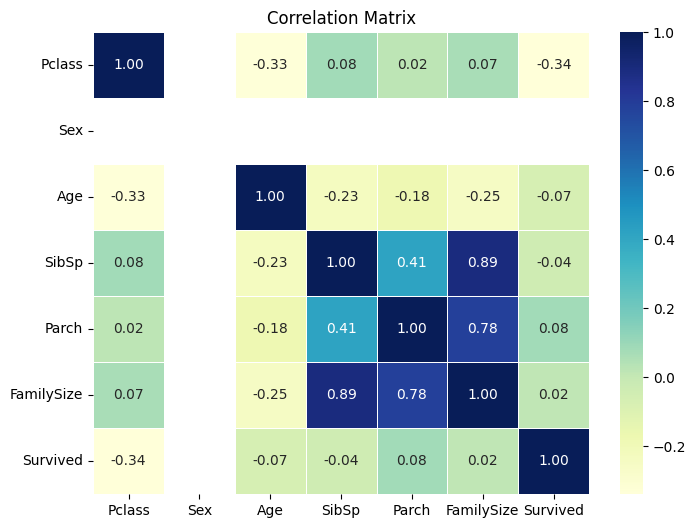

In [65]:
# Data Preprocessing
def preprocess_data(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
    df["FamilySize"] = df["SibSp"] + df["Parch"]
    return df

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "FamilySize"]
target = "Survived"

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Calculate and visualize correlations
corr_matrix = train_data[features + [target]].corr()
pyplot.figure(figsize=(8, 6))
seaborn.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
pyplot.title("Correlation Matrix")
pyplot.show()

#Separate x an y
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]

In [29]:
# Apply random oversampling to balance the data
oversampler = RandomOverSampler(random_state=1)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [30]:
# Split the resampled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=1)

In [31]:
# Define a Keras neural network model
def create_keras_model():
    model = keras.Sequential([
        layers.Dense(128, input_dim=X_train.shape[1], activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

keras_classifier = KerasClassifier(build_fn=create_keras_model, epochs=50, batch_size=64, verbose=1)


In [32]:
# Ensemble Learning (Soft Voting)
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=1)),
    ("SVM (RBF Kernel)", SVC(kernel="rbf", C=1.0, gamma=0.2, probability=True, random_state=1)),
    ("Logistic Regression", LogisticRegression(random_state=1)),
    ("Keras Neural Network", keras_classifier),
]

ensemble = VotingClassifier(models, voting="soft")
# Train the ensemble model
ensemble.fit(X_train, y_train)


Epoch 1/50


d:\Python39\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 [==============================] - 1s 2ms/step - loss: 0.7197 - accuracy: 0.5080
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5558
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6048
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6663
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.6743
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.7062
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.7608
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.7882
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7870
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7870
Epoch 11/50
14/14 [===========

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=1)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(random_state=1)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     random_state=1)),
                             ('SVM (RBF Kernel)',
                              SVC(gamma=0.2, probability=True, random_state=1)),
                             ('Logistic Regression',
                              LogisticRegression(random_state=1)),
                             ('Keras Neural Network',
                              KerasClassifier(batch_size=64, build_fn=<function create_keras_model at 0x000001FB2BA82DC0>, epochs=50))],
                 voting='soft')

In [33]:
# Evaluate the ensemble model on the validation set
ensemble_accuracy = accuracy_score(y_val, ensemble.predict(X_val))
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")

# Get probability estimates for test data
test_probabilities = ensemble.predict_proba(X_test)[:, 1]
print(test_probabilities)


4/4 [==============================] - 0s 1ms/step
Ensemble Model Accuracy: 0.8227272727272728
7/7 [==============================] - 0s 3ms/step
[0.14047731 0.30883058 0.22848652 0.16453926 0.67884317 0.33472496
 0.72074967 0.21287878 0.72702998 0.17609214 0.15052885 0.34985033
 0.95552897 0.27870088 0.90858163 0.90071106 0.2368534  0.15998142
 0.67679576 0.34420313 0.44180722 0.70175247 0.94691499 0.48161421
 0.88536838 0.14155759 0.96216343 0.16470075 0.48751941 0.15871634
 0.22238997 0.20780239 0.59113216 0.57712497 0.46369792 0.15987167
 0.69485834 0.74356573 0.14758556 0.15052885 0.13431201 0.44593966
 0.13731942 0.91922957 0.8599435  0.14758556 0.37839692 0.15052885
 0.84714233 0.58452371 0.51749353 0.24430962 0.89590818 0.80507582
 0.21540807 0.08796967 0.13817173 0.14758556 0.15066253 0.96440846
 0.18353627 0.30099296 0.16016886 0.76890905 0.77304495 0.91682272
 0.72702998 0.36361677 0.51382315 0.82010585 0.73715687 0.15998142
 0.73540969 0.48448866 0.96579838 0.60496635 0.150

In [25]:
# Apply a threshold to convert probabilities to binary predictions
threshold = 0.6
test_predictions = (test_probabilities > threshold).astype(int)

# Save the test predictions to a CSV file
output = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": test_predictions})
output.to_csv("submission_ensemble_with_keras_random_oversampling.csv", index=False)
print("Test predictions saved to submission_ensemble_with_keras.csv")

Test predictions saved to submission_ensemble_with_keras.csv
